# **Linear Regression**

---


The example below uses only the first feature of the diabetes dataset, in order to illustrate the data points within the two-dimensional plot. The straight line can be seen in the plot, showing how linear regression attempts to draw a straight line that will best minimize the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation.

The coefficients, residual sum of squares and the coefficient of determination are also calculated.

In [5]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

In [6]:
#Load Dataset
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ODL/student_scores.csv')

In [7]:
#Data Explore
dataset.shape

(25, 2)

In [8]:
#View first 5 rows
dataset.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [9]:
#Data Summary
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


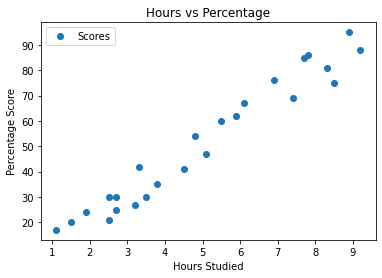

In [10]:
#Visualize Dataset
dataset.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [11]:
#Data Preparation
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [12]:
#Data Partition
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
#Training an Algorithm
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
#Intercept
print(regressor.intercept_)

2.018160041434662


In [15]:
#Slope
print(regressor.coef_)

[9.91065648]


In [16]:
#Prediction
y_pred = regressor.predict(X_test)

To compare the actual output values for X_test with the predicted values, execute the following script:

In [17]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


We can also visualize comparison result as a bar graph using the below script

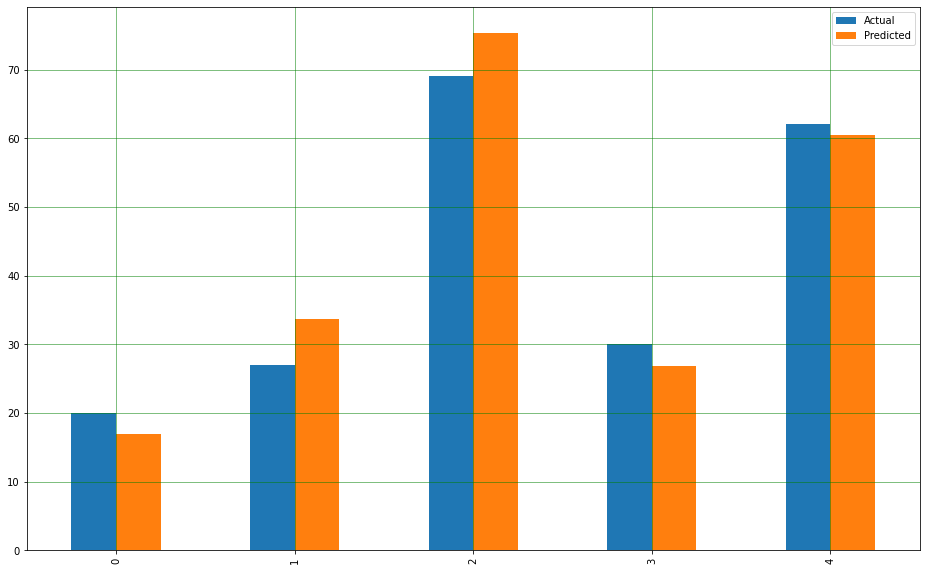

In [18]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Let's plot our straight line with the test data 

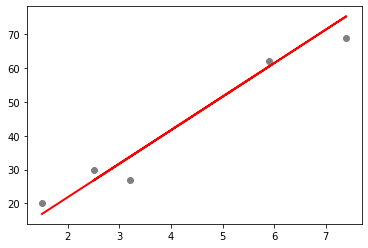

In [19]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

Model Evaluation

---



In [22]:
#Evaluation
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R square:',r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
R square: 0.9454906892105354




---


The value of root mean squared error is 4.64, which is less than 10% of the 
mean value of the percentages of all the students i.e. 51.48. This means that 
our algorithm did a decent job.

